In [1]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Naive bayes

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=0)

gauss_clf = GaussianNB()
multi_clf = MultinomialNB()
bernl_clf = BernoulliNB()

gauss_clf.fit(X_train, y_train)
multi_clf.fit(X_train, y_train)
bernl_clf.fit(X_train, y_train)

BernoulliNB()

In [40]:
y_pred_gauss = gauss_clf.predict(X_test)
y_pred_multi = multi_clf.predict(X_test)
y_pred_bernl = bernl_clf.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_gauss))
print(classification_report(y_test, y_pred_multi))
print(classification_report(y_test, y_pred_bernl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        13
           2       0.20      1.00      0.33         6

    accuracy        

## SVM

In [42]:
from sklearn.datasets import load_svmlight_file
svc = SVC(kernel='rbf', random_state=101)
X_train, y_train = load_svmlight_file('data_set/ijcnn1.bz2')

In [43]:
%%time
scores = cross_val_score(svc,
                         X_train,
                         y_train,
                         cv=5,
                         scoring='accuracy',
                         n_jobs=-1)
print(
    'SVC with rbf kernel -> cross validation accuracy: mean = {:.4f}, std = {:.4f}'
    .format(np.mean(scores), np.std(scores)))

SVC with rbf kernel -> cross validation accuracy: mean = 0.9625, std = 0.0185
Wall time: 31.3 s


In [44]:
%%time
svc_new = SVC(kernel='rbf', random_state=101)
search_dict = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001]
}
search_func = RandomizedSearchCV(estimator=svc_new,
                                 param_distributions=search_dict,
                                 n_iter=10,
                                 scoring='accuracy',
                                 n_jobs=-1,
                                 iid=True,
                                 refit=True,
                                 cv=5,
                                 random_state=101)
search_func.fit(X_train, y_train)
print('Best parameters {}'.format(search_func.best_params_))
print('Cross validation accuracy: mean= {:.4f}'.format(search_func.best_score_))

Best parameters {'gamma': 0.1, 'C': 100}
Cross validation accuracy: mean= 0.9625
Wall time: 9min 7s


In [45]:
%%time
svc_best = SVC(C=100, gamma=0.1, kernel='rbf', random_state=101)
svc_best.fit(X_train, y_train)
print(
    'SVC with rbf kernel -> cross validation accuracy: mean = {:.4f}, std = {:.4f}'
    .format(np.mean(scores), np.std(scores)))

SVC with rbf kernel -> cross validation accuracy: mean = 0.9625, std = 0.0185
Wall time: 41 s


## RandomForest ExtraTrees

In [86]:
from sklearn.datasets import fetch_covtype
covertype = fetch_covtype()
covertype.data.shape

(581012, 54)

In [87]:
covertype_x = covertype.data
covertype_y = covertype.target
covertype_x_train, covertype_x_test_val, covertype_y_train, covertype_y_test_val = train_test_split(
    covertype_x, covertype_y, test_size=0.4, random_state=42)
covertype_x_test, covertype_x_val, covertype_y_test, covertype_y_val = train_test_split(
    covertype_x_test_val, covertype_y_test_val, test_size=0.5, random_state=42)
covertypes = [
    'Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow',
    'Aspen', 'Douglas-fir', 'Krummholz'
]

In [88]:
print(covertype_x_train.shape)
print(covertype_x_val.shape)
print(covertype_x_test.shape)

(348607, 54)
(116203, 54)
(116202, 54)


In [80]:
%%time
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(rfc,
                         covertype_x_train,
                         covertype_y_train,
                         cv=5,
                         scoring='accuracy',
                         n_jobs=-1)
print(
    'RandomForestClassifier -> cross validation accurary: mean = {:.4f}, std = {:.4f}'
    .format(np.mean(scores), np.std(scores)))

RandomForestClassifier -> cross validation accurary: mean = 0.9431, std = 0.0007
Wall time: 2min 41s


In [81]:
scores

array([0.94251456, 0.94254324, 0.94264282, 0.94429225, 0.94356076])

In [82]:
%%time
etc = ExtraTreesClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(etc,
                         covertype_x_train,
                         covertype_y_train,
                         cv=5,
                         scoring='accuracy',
                         n_jobs=-1)
print(
    'ExtraTreesClassifier -> cross validation accurary: mean = {:.4f}, std = {:.4f}'
    .format(np.mean(scores), np.std(scores)))

ExtraTreesClassifier -> cross validation accurary: mean = 0.9426, std = 0.0008
Wall time: 2min 49s


In [83]:
scores

array([0.94211296, 0.94245719, 0.94202608, 0.94426356, 0.94219819])

## CalibrationClassifierCV

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

In [21]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
calibration = CalibratedClassifierCV(rfc, method='sigmoid', cv=5)

In [84]:
rfc.fit(covertype_x_train, covertype_y_train)
calibration.fit(covertype_x_train, covertype_y_train)
prob_raw = rfc.predict_proba(covertype_x_test)
prob_cal = calibration.predict_proba(covertype_x_test)

In [85]:
%matplotlib inline
tree_kind = covertypes.index('Ponderosa Pine')
probs = pd.DataFrame(list(zip(prob_raw[:, tree_kind], prob_cal[:, tree_kind])),
                     columns=['raw', 'calibrated'])
probs

,raw,calibrated
0,0.00,0.001132
1,0.42,0.356083
2,0.00,0.001131
3,0.00,0.001130
4,0.00,0.001130
...,...,...
116197,0.00,0.001131
116198,0.00,0.001128
116199,0.32,0.079379
116200,0.00,0.001134


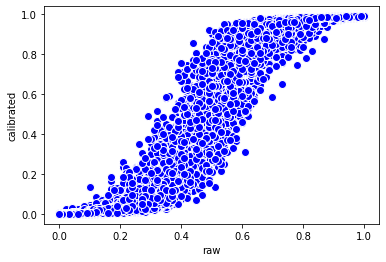

In [86]:
plot = probs.plot(kind='scatter', x=0, y=1, s=64, c='blue', edgecolors='white')

## AdaBoost

In [87]:
%%time
adbc = AdaBoostClassifier(n_estimators=300, random_state=101)
scores = cross_val_score(adbc,
                         covertype_x_train,
                         covertype_y_train,
                         cv=5,
                         scoring='accuracy',
                         n_jobs=-1)
print(
    'Adaboost -> cross validation accurary: mean = {:.4f}, std = {:.4f}'.format(
        np.mean(scores), np.std(scores)))

Adaboost -> cross validation accurary: mean = 0.4493, std = 0.0587
Wall time: 6min 1s


In [88]:
scores

array([0.38596139, 0.40148016, 0.42959797, 0.48293914, 0.54637771])

## GradientBoost

In [89]:
%%time
gbc = GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=101)
gbc.fit(covertype_x_train, covertype_y_train)

Wall time: 19min 18s


GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=101)

In [90]:
accuracy_score(covertype_y_val, rfc.predict(covertype_x_val))

0.948254347994458

In [91]:
accuracy_score(covertype_y_test, rfc.predict(covertype_x_test))

0.9477547718627907

## XGBoost

In [92]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(object='multi:softprob',
                              max_depth=24,
                              gamma=0.1,
                              subsample=0.9,
                              learning_rate=0.01,
                              n_estimators=500,
                              nthread=-1)

In [93]:
%%time
xgb_model.fit(covertype_x_train,
              covertype_y_train,
              eval_set=[(covertype_x_val, covertype_y_val)],
              eval_metric='merror',
              early_stopping_rounds=25,
              verbose=True)

[20:01:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { object } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-merror:0.07679
Will train until validation_0-merror hasn't improved in 25 rounds.
[1]	validation_0-merror:0.06606
[2]	validation_0-merror:0.06125
[3]	validation_0-merror:0.05930
[4]	validation_0-merror:0.05846
[5]	validation_0-merror:0.05813
[6]	validation_0-merror:0.05737
[7]	validation_0-merror:0.05706
[8]	validation_0-merror:0.05647
[9]	validation_0-merror:0.05622
[10]	validation_0-merror:0.05571
[11]	validation_0-merror:0.05525
[12]	validation_0-merror:0.05520
[13]	validation_0-merror:0.05461
[14]	validation_0-merror:0.05428
[15]	validation_0-merror:0.05423
[16]	validation_0-merror:0.0538

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              object='multi:softprob', objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [94]:
accuracy_score(covertype_y_test, xgb_model.predict(covertype_x_test))

0.9671606340682605

In [95]:
confusion_matrix(covertype_y_test, xgb_model.predict(covertype_x_test))

array([[40838,  1494,     0,     0,    17,     2,    64],
       [ 1025, 55248,    67,     0,    90,    43,    22],
       [    0,    69,  6980,    35,     6,   104,     0],
       [    0,     0,    54,   463,     0,    12,     0],
       [   21,   276,    31,     0,  1637,     8,     0],
       [    3,    85,   141,    10,     3,  3304,     0],
       [  117,    17,     0,     0,     0,     0,  3916]], dtype=int64)

In [96]:
print(
    classification_report(covertype_y_test,
                          xgb_model.predict(covertype_x_test)))

              precision    recall  f1-score   support

           1       0.97      0.96      0.97     42415
           2       0.97      0.98      0.97     56495
           3       0.96      0.97      0.96      7194
           4       0.91      0.88      0.89       529
           5       0.93      0.83      0.88      1973
           6       0.95      0.93      0.94      3546
           7       0.98      0.97      0.97      4050

    accuracy                           0.97    116202
   macro avg       0.95      0.93      0.94    116202
weighted avg       0.97      0.97      0.97    116202



## XGBoost gpu vs cpu

In [89]:
import xgboost as xgb

xgb_cpu = xgb.XGBClassifier(object='multi:softprob',
                            max_depth=8,
                            gamma=0.1,
                            subsample=0.9,
                            learning_rate=0.01,
                            n_estimators=200,
                            nthread=-1)

In [90]:
%%time
xgb_cpu.fit(covertype_x_train,
            covertype_y_train,
            eval_set=[(covertype_x_val, covertype_y_val)],
            eval_metric='merror',
            early_stopping_rounds=25,
            verbose=True)

[09:34:19] WARNING: D:\Projects\other_projects\xgboost\src\learner.cc:529: 
Parameters: { object } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-merror:0.21399
[1]	validation_0-merror:0.21641
[2]	validation_0-merror:0.21486
[3]	validation_0-merror:0.21350
[4]	validation_0-merror:0.21427
[5]	validation_0-merror:0.21401
[6]	validation_0-merror:0.21372
[7]	validation_0-merror:0.21296
[8]	validation_0-merror:0.21235
[9]	validation_0-merror:0.21210
[10]	validation_0-merror:0.21214
[11]	validation_0-merror:0.21132
[12]	validation_0-merror:0.21171
[13]	validation_0-merror:0.21129
[14]	validation_0-merror:0.21112
[15]	validation_0-merror:0.21057
[16]	validation_0-merror:0.21017
[17]	validation_0-merror:0.21022
[18]	validation_0-merror:0.20971
[19]	validation_0-merror:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              object='multi:softprob', objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [102]:
xgb_gpu = xgb.XGBClassifier(object='multi:softprob',
                            max_depth=8,
                            gamma=0.1,
                            subsample=0.9,
                            learning_rate=0.01,
                            n_estimators=200,
                            nthread=-1,
                            tree_method='gpu_hist',
                            gpu_id=0)

In [103]:
%%time
xgb_gpu.fit(covertype_x_train,
            covertype_y_train,
            eval_set=[(covertype_x_val, covertype_y_val)],
            eval_metric='merror',
            early_stopping_rounds=25,
            verbose=True)

[10:01:00] WARNING: D:\Projects\other_projects\xgboost\src\learner.cc:529: 
Parameters: { object } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-merror:0.21819
[1]	validation_0-merror:0.21678
[2]	validation_0-merror:0.21659
[3]	validation_0-merror:0.21447
[4]	validation_0-merror:0.21370
[5]	validation_0-merror:0.21469
[6]	validation_0-merror:0.21351
[7]	validation_0-merror:0.21265
[8]	validation_0-merror:0.21252
[9]	validation_0-merror:0.21265
[10]	validation_0-merror:0.21286
[11]	validation_0-merror:0.21154
[12]	validation_0-merror:0.21166
[13]	validation_0-merror:0.21123
[14]	validation_0-merror:0.21070
[15]	validation_0-merror:0.21067
[16]	validation_0-merror:0.21046
[17]	validation_0-merror:0.21040
[18]	validation_0-merror:0.21009
[19]	validation_0-merror:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              object='multi:softprob', objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.9, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

## LightGBM

In [7]:
covertype_y_train_1 = covertype_y_train - 1
covertype_y_val_1 = covertype_y_val - 1
covertype_y_test_1 = covertype_y_test - 1

In [7]:
import lightgbm as lgb

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': len(np.unique(covertype_y)),
    'metric': 'multi_logloss',
    'learning_rate': 0.01,
    'max_depth': 128,
    'num_leaves': 256,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 10,
    'device': 'cpu'
}

In [10]:
train_data = lgb.Dataset(data=covertype_x_train, label=covertype_y_train_1)
val_data = lgb.Dataset(data=covertype_x_val, label=covertype_y_val_1)

In [10]:
bst = lgb.train(params,
                train_data,
                num_boost_round=2500,
                valid_sets=val_data,
                verbose_eval=500,
                early_stopping_rounds=25)

Training until validation scores don't improve for 25 rounds
[500]	valid_0's multi_logloss: 0.258546
[1000]	valid_0's multi_logloss: 0.188758
[1500]	valid_0's multi_logloss: 0.159213
[2000]	valid_0's multi_logloss: 0.140833
[2500]	valid_0's multi_logloss: 0.127889
Did not meet early stopping. Best iteration is:
[2500]	valid_0's multi_logloss: 0.127889


In [15]:
lgb_cv = lgb.cv(params,
                train_data,
                num_boost_round=2500,
                nfold=3,
                shuffle=True,
                verbose_eval=250,
                early_stopping_rounds=25)

[250]	cv_agg's multi_logloss: 0.383821 + 0.000454662
[500]	cv_agg's multi_logloss: 0.265271 + 0.000599288
[750]	cv_agg's multi_logloss: 0.220832 + 0.000458877
[1000]	cv_agg's multi_logloss: 0.196948 + 0.000144783
[1250]	cv_agg's multi_logloss: 0.180572 + 0.000345486
[1500]	cv_agg's multi_logloss: 0.167917 + 0.000484253
[1750]	cv_agg's multi_logloss: 0.157947 + 0.000538372
[2000]	cv_agg's multi_logloss: 0.150243 + 0.000658097
[2250]	cv_agg's multi_logloss: 0.143914 + 0.000544808
[2500]	cv_agg's multi_logloss: 0.139016 + 0.000600344


In [17]:
nround = lgb_cv['multi_logloss-mean'].index(np.min(
    lgb_cv['multi_logloss-mean']))
nround

2499

In [13]:
y_probs = bst.predict(covertype_x_test, num_iteration=bst.best_iteration)
y_preds = np.argmax(y_probs, axis=1)
print(accuracy_score(covertype_y_test_1, y_preds))
print(confusion_matrix(covertype_y_test_1, y_preds))

0.9591917522934201
[[40188  2142     0     0    14     0    71]
 [ 1442 54835    68     0    84    45    21]
 [    2    61  7011    23     5    92     0]
 [    0     0    58   455     0    16     0]
 [   20   231    27     0  1689     6     0]
 [    2    70   110    10     3  3351     0]
 [  107    12     0     0     0     0  3931]]


In [14]:
print(classification_report(covertype_y_test_1, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     42415
           1       0.96      0.97      0.96     56495
           2       0.96      0.97      0.97      7194
           3       0.93      0.86      0.89       529
           4       0.94      0.86      0.90      1973
           5       0.95      0.95      0.95      3546
           6       0.98      0.97      0.97      4050

    accuracy                           0.96    116202
   macro avg       0.96      0.93      0.94    116202
weighted avg       0.96      0.96      0.96    116202



## LightGBM GPU vs CPU

In [17]:
import lightgbm as lgb

params_cpu = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': len(np.unique(covertype_y)),
    'metric': 'multi_logloss',
    'learning_rate': 0.01,
    'max_depth': 128,
    'num_leaves': 256,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 10,
    "n_jobs": 8,
    'device': 'cpu',
    'n_jobs': -1,
}

In [18]:
%%time
bst_cpu = lgb.train(params_cpu,
                    train_data,
                    num_boost_round=500,
                    valid_sets=val_data,
                    verbose_eval=100,
                    early_stopping_rounds=25)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 348607, number of used features: 53
[LightGBM] [Info] Start training from score -1.008130
[LightGBM] [Info] Start training from score -0.718670
[LightGBM] [Info] Start training from score -2.786590
[LightGBM] [Info] Start training from score -5.333962
[LightGBM] [Info] Start training from score -4.133503
[LightGBM] [Info] Start training from score -3.514835
[LightGBM] [Info] Start training from score -3.339237
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 25 rounds
[100]	valid_0's multi_logloss: 0.46432
[200]	valid_0's multi_logloss: 0.316533
[300]	valid_0's multi_logloss: 0.254985
[400]	valid_0's multi_logloss: 0.222611
[500]	valid_0's multi_logloss: 0.2

In [19]:
params_gpu = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': len(np.unique(covertype_y)),
    'metric': 'multi_logloss',
    'learning_rate': 0.01,
    'max_depth': 128,
    'num_leaves': 256,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 10,
    "n_jobs": 8,
    'device': 'gpu',
    'gpu_platform_id': 2,
    'gpu_device_id': 1,
}

In [20]:
%%time
bst_gpu = lgb.train(params_gpu,
                    train_data,
                    num_boost_round=500,
                    valid_sets=val_data,
                    verbose_eval=100,
                    early_stopping_rounds=25)

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 348607, number of used features: 53
[LightGBM] [Info] Using GPU Device: GeForce GTX 1060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 12 dense feature groups (3.99 MB) transferred to GPU in 0.008094 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -1.008130
[LightGBM] [Info] Start training from score -0.718670
[LightGBM] [Info] Start training from score -2.786590
[LightGBM] [Info] Start training from score -5.333962
[LightGBM] [Info] Start training from score -4.133503
[LightGBM] [Info] Start training from score -3.514835
[LightGBM] [Info] Start training from score -3.339237
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 12 dense feature groups (3.59 MB) 

## CatBoost

In [64]:
from catboost import CatBoostClassifier, Pool

covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
label = covertype_dataset.target.astype(int) - 1
wilderness_area = np.argmax(covertype_dataset.data[:, 10:(10 + 4)], axis=1)
soil_type = np.argmax(covertype_dataset.data[:, (10 + 4):(10 + 4 + 40)], axis=1)
data = (covertype_dataset.data[:, :10], wilderness_area.reshape(-1,
                                                                1).astype(str),
        soil_type.reshape(-1, 1).astype(str))
data = np.hstack(data)

In [66]:
covertype_train = Pool(data=data[:15000, :],
                       label=label[:15000],
                       cat_features=[10, 11])
covertype_val = Pool(data[15000:20000, :], label[15000:20000], [10, 11])
covertype_test_x = Pool(data[20000:25000, :], None, [10, 11])
covertype_test_y = label[20000:25000]

In [75]:
cbc_cpu = CatBoostClassifier(iterations=2500,
                             learning_rate=0.05,
                             depth=8,
                             custom_loss='Accuracy',
                             eval_metric='Accuracy',
                             use_best_model=True,
                             loss_function='MultiClass',
                             task_type='CPU',
                             thread_count=-1)

In [76]:
cbc_cpu.fit(covertype_train, eval_set=covertype_val, verbose=500, plot=False)

0:	learn: 0.6639333	test: 0.6690000	best: 0.6690000 (0)	total: 133ms	remaining: 5m 32s
500:	learn: 0.8766000	test: 0.8084000	best: 0.8090000 (493)	total: 2m 14s	remaining: 8m 58s
1000:	learn: 0.9358000	test: 0.8276000	best: 0.8284000 (987)	total: 4m 45s	remaining: 7m 6s
1500:	learn: 0.9673333	test: 0.8316000	best: 0.8318000 (1477)	total: 7m 17s	remaining: 4m 50s
2000:	learn: 0.9844667	test: 0.8344000	best: 0.8344000 (1996)	total: 9m 39s	remaining: 2m 24s
2499:	learn: 0.9928667	test: 0.8368000	best: 0.8368000 (2499)	total: 12m 14s	remaining: 0us

bestTest = 0.8368
bestIteration = 2499



In [78]:
preds_class_cpu = cbc_cpu.predict(covertype_test_x)
preds_proba_cpu = cbc_cpu.predict_proba(covertype_test_x)

In [79]:
print(accuracy_score(covertype_test_y, preds_class_cpu))
print(confusion_matrix(covertype_test_y, preds_class_cpu))

0.8392
[[1483  321    0    0    0    0   16]
 [ 237 2172   14    0    9   14    2]
 [   0   11  269    4    0   17    0]
 [   0    0    4   19    0    4    0]
 [   1   47    7    0   22    0    0]
 [   0   16   42    1    0   85    0]
 [  36    1    0    0    0    0  146]]


In [80]:
print(classification_report(covertype_test_y, preds_class_cpu))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1820
           1       0.85      0.89      0.87      2448
           2       0.80      0.89      0.84       301
           3       0.79      0.70      0.75        27
           4       0.71      0.29      0.41        77
           5       0.71      0.59      0.64       144
           6       0.89      0.80      0.84       183

    accuracy                           0.84      5000
   macro avg       0.80      0.71      0.74      5000
weighted avg       0.84      0.84      0.84      5000



In [81]:
cbc_gpu = CatBoostClassifier(iterations=2500,
                             learning_rate=0.05,
                             depth=8,
                             custom_loss='Accuracy',
                             eval_metric='Accuracy',
                             use_best_model=True,
                             loss_function='MultiClass',
                             task_type='GPU',
                             thread_count=-1)

In [82]:
cbc_gpu.fit(covertype_train, eval_set=covertype_val, verbose=500, plot=False)

0:	learn: 0.6304000	test: 0.6248000	best: 0.6248000 (0)	total: 36.5ms	remaining: 1m 31s
500:	learn: 0.8871333	test: 0.8076000	best: 0.8076000 (497)	total: 16.7s	remaining: 1m 6s
1000:	learn: 0.9448667	test: 0.8272000	best: 0.8282000 (992)	total: 37s	remaining: 55.5s
1500:	learn: 0.9734667	test: 0.8336000	best: 0.8358000 (1443)	total: 54.9s	remaining: 36.5s
2000:	learn: 0.9886667	test: 0.8380000	best: 0.8396000 (1950)	total: 1m 14s	remaining: 18.6s
2499:	learn: 0.9950000	test: 0.8394000	best: 0.8414000 (2348)	total: 1m 35s	remaining: 0us
bestTest = 0.8414
bestIteration = 2348
Shrink model to first 2349 iterations.


In [83]:
preds_class_gpu = cbc_gpu.predict(covertype_test_x)
preds_proba_gpu = cbc_gpu.predict_proba(covertype_test_x)

In [84]:
print(accuracy_score(covertype_test_y, preds_class_gpu))
print(confusion_matrix(covertype_test_y, preds_class_gpu))

0.84
[[1477  327    0    0    0    0   16]
 [ 231 2181   11    0    9   13    3]
 [   0   15  265    4    0   17    0]
 [   0    0    6   18    0    3    0]
 [   1   44    6    0   26    0    0]
 [   0   15   43    1    0   85    0]
 [  34    1    0    0    0    0  148]]


In [85]:
print(classification_report(covertype_test_y, preds_class_gpu))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1820
           1       0.84      0.89      0.87      2448
           2       0.80      0.88      0.84       301
           3       0.78      0.67      0.72        27
           4       0.74      0.34      0.46        77
           5       0.72      0.59      0.65       144
           6       0.89      0.81      0.85       183

    accuracy                           0.84      5000
   macro avg       0.80      0.71      0.74      5000
weighted avg       0.84      0.84      0.84      5000



## ThunderGBM

In [11]:
import thundersvm

OSError: [WinError 126] 找不到指定的模块。

In [4]:
clf?

Object `clf` not found.


In [7]:
!pip list

Package                            Version
---------------------------------- -------------------
aiohttp                            3.6.3
alabaster                          0.7.12
altgraph                           0.17
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.1.post1
async-timeout                      3.0.1
atomicwrites                       1.4.0
attrs                              20.1.0
autopep8                           1.5.4
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                       